# Обработка и визуализация данных

Заимпортим библиотеки, которые могут нам пригодиться.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)

Считываем данные из 21* файла, которые получили раннее. Соединяем всю информацию в одну пандасовскую таблицу.

In [3]:
df_1 = pd.read_csv("our_csv1.csv", sep = ";")
df_2 = pd.read_csv("our_csv2.csv", sep = ";")
df_3 = pd.read_csv("our_csv3.csv", sep = ";")
df_4 = pd.read_csv("our_csv4 (2).csv", sep = ";")
df_5 = pd.read_csv("our_csv5 (3).csv", sep = ";")
df_6 = pd.read_csv("our_csv6.csv", sep = ";")
df_7 = pd.read_csv("our_csv7.csv", sep = ";")
df_8 = pd.read_csv("our_csv8 (1).csv", sep = ";")
df_9 = pd.read_csv("our_csv9.csv", sep = ";")
df_10 = pd.read_csv("our_csv10.csv", sep = ";")
#df_11 = pd.read_csv("our_csv11.csv", sep = ";") он на самом деле есть, перед дедлайном случайно удалили, потом восстановим
df_12 = pd.read_csv("our_csv12 (1).csv", sep = ";")
df_13 = pd.read_csv("our_csv13.csv", sep = ";")
df_14 = pd.read_csv("our_csv14 (3).csv", sep = ";")
df_15 = pd.read_csv("our_csv15 (1).csv", sep = ";")
df_16 = pd.read_csv("our_csv16 (2).csv", sep = ";")
df_17 = pd.read_csv("our_csv17.csv", sep = ";")
df_18 = pd.read_csv("our_csv18 (1).csv", sep = ";")
df_19 = pd.read_csv("our_csv19.csv", sep = ";")
df_20 = pd.read_csv("our_csv20.csv", sep = ";")
df_21 = pd.read_csv("our_csv21.csv", sep = ";", on_bad_lines='skip')

df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_12, df_13, df_14, df_15, df_16, df_17, df_18, df_19, df_20, df_21])


In [4]:
df.reset_index(drop = True, inplace = True)
df

,Metro,Number of Rooms,Square,Current Floor,Total Floors,Auction,Price,Requisites Checked
0,Дмитровская,4,138,4,59,Нет аукциона,74 000 000,Реквизиты проверены
1,Ломоносовский проспект,2,"37,1",3,9,Нет аукциона,13 900 000,Реквизиты не проверены
2,Дмитровская,4,132,5,59,Нет аукциона,75 000 000,Реквизиты проверены
3,Бунинская аллея,2,38,6,8,Нет аукциона,13 400 000,Реквизиты не проверены
4,Зюзино,2,84,5,31,Нет аукциона,35 950 000,Реквизиты не проверены
...,...,...,...,...,...,...,...,...
973,Чертановская,1,"34,1",8,9,Нет аукциона,9 000 000,Реквизиты не проверены
974,Кантемировская,3,64,14,14,Нет аукциона,14 300 000,Экологический вклад -9 кг CO₂
975,Первомайская,1,31,3,9,Нет аукциона,8 550 000,Реквизиты проверены
976,Тушинская,1,33,4,5,Нет аукциона,10 500 000,Реквизиты не проверены


Проверим наличие пропусков в данных.

In [5]:
df.isnull().sum().sum()

0

Пропусков нет, что и неудивительно, так как мы не парсили такие данные.

Посмотрим на типы данных в каждом столбце для проверки того, что данные интерпретируются корректно.

In [6]:
df.dtypes

Metro                  object
 Number of Rooms        int64
 Square                object
 Current Floor          int64
 Total Floors           int64
 Auction               object
 Price                 object
 Requisites Checked    object
dtype: object

Как видно, есть пара несостыковок типа данных и их смысловой нагрузки, а именно: square считывается как строка, так как в десятичных дробях используются в качестве разделителей запятые; аналогично с price (между тысячами стоят пробелы, из-за чего воспринимается как str)

In [7]:
df[' Square'] = df[' Square'].apply(lambda x: x.replace(",", "."))

In [8]:
df[' Square'] = df[' Square'].astype(float)
df.head()

,Metro,Number of Rooms,Square,Current Floor,Total Floors,Auction,Price,Requisites Checked
0,Дмитровская,4,138.0,4,59,Нет аукциона,74 000 000,Реквизиты проверены
1,Ломоносовский проспект,2,37.1,3,9,Нет аукциона,13 900 000,Реквизиты не проверены
2,Дмитровская,4,132.0,5,59,Нет аукциона,75 000 000,Реквизиты проверены
3,Бунинская аллея,2,38.0,6,8,Нет аукциона,13 400 000,Реквизиты не проверены
4,Зюзино,2,84.0,5,31,Нет аукциона,35 950 000,Реквизиты не проверены


In [9]:
df[' Price'] = df[' Price'].apply(lambda x: "".join(x.split()))
df[' Price'] = df[' Price'].apply(lambda x: np.where(x.isdigit() == False, x[2:], x))

In [10]:
df[' Price'] = df[' Price'].astype(int)

Теперь типы данных соотвествуют реалиям.

In [11]:
df.dtypes

Metro                   object
 Number of Rooms         int64
 Square                float64
 Current Floor           int64
 Total Floors            int64
 Auction                object
 Price                   int32
 Requisites Checked     object
dtype: object

Теперь закодируем бинарные признаки: requisites checked (если реквизиты/документы проверены - 1, в противном случае - 0), auction (если квартира выставлена на аукцион - 1, в противном случае - 0).

In [12]:
df[' Requisites Checked'].value_counts()
df["Requisites Checked"] = np.where((df[' Requisites Checked'] == "Реквизиты проверены") | (df[' Requisites Checked'] == "Документы проверены "), 1, 0)

In [13]:
df.drop(' Requisites Checked', axis = 1, inplace = True)
df.head()

,Metro,Number of Rooms,Square,Current Floor,Total Floors,Auction,Price,Requisites Checked
0,Дмитровская,4,138.0,4,59,Нет аукциона,74000000,1
1,Ломоносовский проспект,2,37.1,3,9,Нет аукциона,13900000,0
2,Дмитровская,4,132.0,5,59,Нет аукциона,75000000,1
3,Бунинская аллея,2,38.0,6,8,Нет аукциона,13400000,0
4,Зюзино,2,84.0,5,31,Нет аукциона,35950000,0


In [14]:
df["Auction"] = np.where(df[' Auction'] == "Нет аукциона", 0, 1)

In [15]:
df.drop(' Auction', axis = 1, inplace = True)
df.head()

,Metro,Number of Rooms,Square,Current Floor,Total Floors,Price,Requisites Checked,Auction
0,Дмитровская,4,138.0,4,59,74000000,1,0
1,Ломоносовский проспект,2,37.1,3,9,13900000,0,0
2,Дмитровская,4,132.0,5,59,75000000,1,0
3,Бунинская аллея,2,38.0,6,8,13400000,0,0
4,Зюзино,2,84.0,5,31,35950000,0,0


Создадим новый категориальный признак. Будем по названию ближайшего к квартире метро определять его ветку. Для этого создадим словарь, где ключами будут являться цвета ветки, а значениями - список станций, относящихся к ней. Сразу сделаем ручной one-hot.

In [16]:
branch_metro = {'Красная': ["Сокольническая", "Библиотека имени Ленина", "Бульвар Рокоссовского", "Воробьевы горы", "Коммунарка",
                            "Комсомольская", "Красносельская", "Красные ворота", "Кропоткинская", "Лубянка", "Ольховая", "Охотный ряд", 
                            "Парк Культуры", "Преображенская площадь", "Прокшино", "Проспект Вернадского", "Румянцево", "Саларьево",
                            "Сокольники", "Спортивная", "Тропарёво", "Университет", "Филатов Луг", "Фрунзенская", "Черкизовская", 
                            "Чистые пруды", "Юго-Западная"], 
                'Зеленая': ["Замоскворецкая", "Автозаводская", "Алма-Атинская", "Аэропорт", "Беломорская", "Белорусская", "Водный стадион",
                           "Войковская", "Динамо", "Домодедовская", "Кантемировская", "Каширская", "Коломенская", "Красногвардейская",
                           "Маяковская", "Новокузнецкая", "Орехово", "Павелецкая", "Речной вокзал", "Сокол", "Тверская", "Театральная", 
                           "Технопарк", "Ховрино", "Царицыно"],
                'Синяя': ["Арбатско-Покровская", "Арбатская", "Бауманская", "Волоколамская", "Измайловская", "Киевская", "Крылатское", 
                         "Кунцевская", "Курская", "Митино", "Молодежная", "Мякинино", "Парк Победы", "Партизанская", "Первомайская", 
                         "Площадь Революции", "Пятницкое шоссе", "Семеновская", "Славянский бульвар", "Ремонт вестибюля", "Смоленская",
                         "Строгино", "Щелковская", "Электрозаводская"],
                'Голубая': ["Филевская", "Александровский сад", "Арбатская", "Багратионовская", "Выставочная", "Киевская", "Кунцевская",
                           'Кутузовская', 'Международная,' 'Пионерская', 'Смоленская', 'Студенческая', 'Филевский парк', 'Фили'],
                'Коричневая': ['Кольцевая', 'Белорусская', 'Добрынинская', 'Киевская', 'Комсомольская', 'Краснопресненская', 'Курская',
                              'Новослободская', 'Октябрьская', 'Павелецкая', 'Парк Культуры', 'Проспект Мира', 'Таганская'],
                'Оранжевая': ['Калужско-Рижская', 'Академическая', 'Алексеевская', 'Бабушкинская', 'Беляево', 'Ботанический сад',
                             'ВДНХ','Калужская', 'Китай-город', 'Коньково', 'Ленинский проспект', 'Медведково', 'Новоясеневская', 
                             'Новые Черёмушки', 'Октябрьская', 'Проспект Мира', 'Профсоюзная', 'Рижская', 'Свиблово', 'Сухаревская', 
                             'Теплый стан', 'Третьяковская', 'Тургеневская', 'Шаболовская', 'Ясенево'],

                'Фиолетовая': ['Таганско-Краснопресненская', 'Баррикадная', 'Беговая', 'Волгоградский проспект', 'Выхино', 'Жулебино', 
                              'Китай-город', 'Котельники', 'Кузнецкий мост', 'Кузьминки', 'Лермонтовский проспект', 'Октябрьское поле', 
                              'Планерная', 'Полежаевская', 'Пролетарская', 'Пушкинская', 'Рязанский проспект', 'Спартак', 'Сходненская', 
                              'Таганская', 'Текстильщики', 'Тушинская', 'Улица 1905 года', 'Щукинская'],

                'Желтая': ['Калининская', 'Авиамоторная', 'Боровское шоссе', 'Говорово', 'Деловой центр', 'Ломоносовский проспект', 
                          'Марксистская', 'Минская', 'Мичуринский проспект', 'Новогиреево', 'Новокосино', 'Новопеределкино', 'Озёрная', 
                          'Парк Победы', 'Перово', 'Площадь Ильича', 'Раменки', 'Рассказовка', 'Солнцево', 'Третьяковская',
                          'Шоссе Энтузиастов'],

                'Серая': ['Серпуховско-Тимирязевская', 'Алтуфьево', 'Аннино', 'Бибирево', 'Боровицкая', 'Бульвар Дмитрия Донского', 
                         'Владыкино', 'Дмитровская', 'Менделеевская', 'Нагатинская', 'Нагорная', 'Нахимовский Проспект', 
                         'Отрадное', 'Петровско-Разумовская', 'Полянка', 'Пражская', 'Савеловская', 'Севастопольская', 'Серпуховская', 
                         'Тимирязевская', 'Тульская', 'Улица академика Янгеля', 'Цветной бульвар', 'Чертановская', 'Чеховская', 'Южная'],

                'Салатовая': ['Люблинско-Дмитровская', 'Борисово', 'Братиславская', 'Бутырская', 'Верхние Лихоборы', 'Волжская', 
                             'Достоевская', 'Дубровка', 'Зябликово', 'Кожуховская', 'Крестьянская застава', 'Люблино', 'Марьина роща', 
                             'Марьино', 'Окружная', 'Петровско-Разумовская', 'Печатники', 'Римская', 'Селигерская', 'Сретенский бульвар',
                             'Трубная', 'Фонвизинская,' 'Чкаловская', 'Шипиловская'],

                'БКЛ': ['Большая кольцевая', 'Авиамоторная', 'Аминьевская', 'Варшавская', 'Воронцовская', 'Давыдково', 'Деловой центр', 
                       'Зюзино', 'Каховская', 'Каширская', 'Кленовый бульвар', 'Кунцевская', 'Лефортово', 'Марьина Роща',
                       'Мичуринский проспект', 'Мнёвники', 'Нагатинский Затон', 'Народное Ополчение', 'Нижегородская', 'Новаторская',
                       'Петровский парк', 'Печатники', 'Проспект Вернадского', 'Рижская', 'Савеловская', 'Сокольники', 'Текстильщики',
                       'Терехово', 'Хорошёвская', 'ЦСКА', 'Шелепиха', 'Электрозаводская'],

                'Серо-голубая': ['Бутовская', 'Битцевский парк', 'Бульвар адмирала Ушакова', 'Бунинская Аллея', 'Лесопарковая',
                                'Улица Горчакова', 'Улица Скобелевская', 'Улица Старокачаловская'],

                'Бирюзовая': ['Московская монорельсовая транспортная система', 'Выставочный центр', 'Телецентр', 'Тимирязевская', 
                    'Улица Академика Королёва', 'Улица Милашенкова'],

                'МЦК': ['Московское центральное кольцо', 'Автозаводская', 'Андроновка', 'Балтийская', 'Белокаменная',' Ботанический сад',
                       'Бульвар Рокоссовского, Верхние Котлы', 'Владыкино', 'Деловой центр', 'Дубровка', 'ЗИЛ', 'Зорге', 'Измайлово', 
                       'Коптево', 'Крымская', 'Кутузовская', 'Лихоборы', 'Локомотив', 'Лужники', 'Нижегородская', 'Новохохловская', 'Окружная',  
                       'Панфиловская', 'Площадь Гагарина', 'Ростокино', 'Соколиная Гора', 'Стрешнево', 'Угрешская', 'Хорошёво', 'Шелепиха',
                       'Шоссе Энтузиастов'],
                'Розовая': ['Некрасовская', 'Косино', 'Лухмановская', 'Некрасовка', 'Нижегородская', 'Окская', 'Стахановская', 
                           'Улица Дмитриевского', 'Юго-Восточная']}


In [17]:
for color in branch_metro:
    df[color] = np.where(df['Metro'].isin(branch_metro[color]), 1, 0)
df.head()

,Metro,Number of Rooms,Square,Current Floor,Total Floors,Price,Requisites Checked,Auction,Красная,Зеленая,...,Оранжевая,Фиолетовая,Желтая,Серая,Салатовая,БКЛ,Серо-голубая,Бирюзовая,МЦК,Розовая
0,Дмитровская,4,138.0,4,59,74000000,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Ломоносовский проспект,2,37.1,3,9,13900000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Дмитровская,4,132.0,5,59,75000000,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Бунинская аллея,2,38.0,6,8,13400000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Зюзино,2,84.0,5,31,35950000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Теперь посмотрим на распределение данных по признакам в нашей выборке.

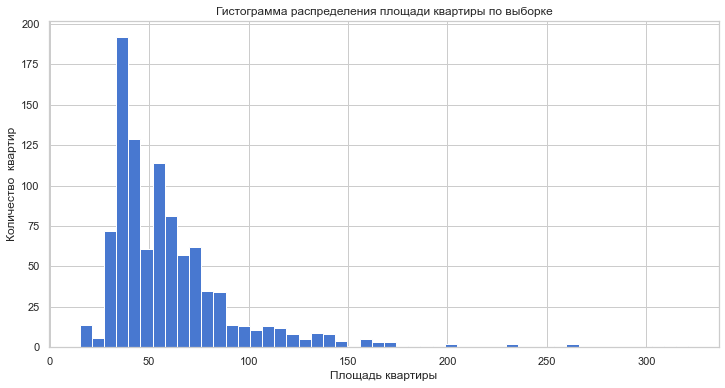

In [18]:
plt.hist(df[' Square'], bins = 50)
plt.title('Гистограмма распределения площади квартиры по выборке')
plt.xlabel('Площадь квартиры')
plt.ylabel('Количество  квартир');

На диаграмме распределения площади квартир в выборке визуально заметно, что данное распределение похоже на Хи-квадрат (с малым количеством степеней свободы > 2). В выборке представлено незначительное количество квартир с общей площадью более 200 м^2, что являются выбросами. Но тем не менее мы не будем исключать их из выборки, так как считаем важным обстоятельством рассматривать полный спектр квартир вторичного жилья.

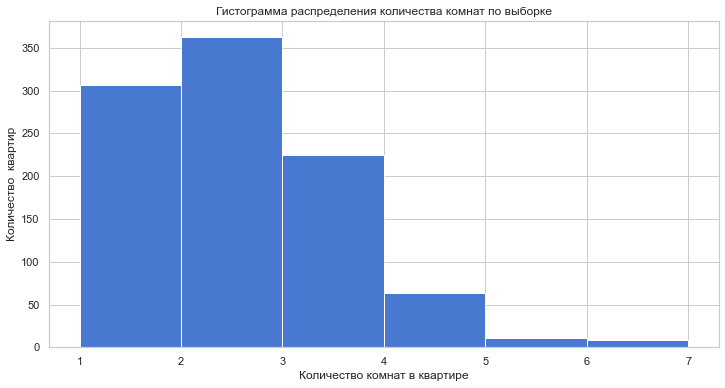

In [19]:
plt.hist(df[' Number of Rooms'], bins = 6)
plt.title('Гистограмма распределения количества комнат по выборке')
plt.xlabel('Количество комнат в квартире')
plt.ylabel('Количество  квартир');

На гистограмме распределения количества комнат видно, что в выборке наибольшее количество 2-ух комнатных квартир (около 380), примерно 320 квартир однокомнатных и 240 трехкомнатных. Наименьшее количество шестикомнатных и семикомнатных квартир представлено в выборке. В общих чертах распределение похоже на Хи-квадрат (с малым количеством степеней свободы > 2).

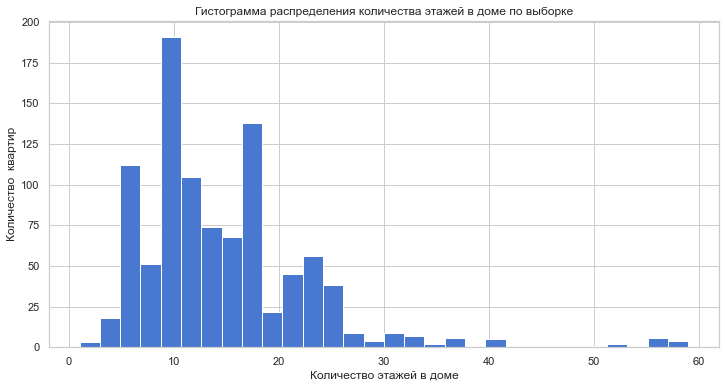

In [20]:
plt.hist(df[' Total Floors'], bins = 30)
plt.title('Гистограмма распределения количества этажей в доме по выборке')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество  квартир');

На гистограмме распределения общего количества этажей в доме видно, что данное распределение визуально похоже на Хи-квадрат. Большинство квартир вторичного жилья находятся в десятиэтажках (мода для общего количества этажей в здании). С увеличением общего количества этажей в доме, число квартир в выборке уменьшается. Однако стоит заметить, что в представленной выборке отсутствуют наблюдения с 40-50 этажами в здании в качестве признака, но в диапазине 50-60 этажей есть некоторые объекты, что странно. Возможно, квартиры, попавшие в этот диапазон, находятся в Москва-Сити.

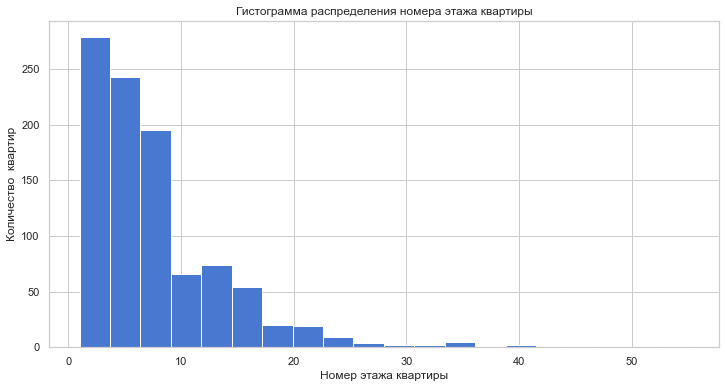

In [21]:
plt.hist(df[' Current Floor'], bins = 20)
plt.title('Гистограмма распределения номера этажа квартиры')
plt.xlabel('Номер этажа квартиры')
plt.ylabel('Количество  квартир');

На данной гистограмме видно, что распределение номера этажа квартиры визуально похоже на экспоненциальное: с увеличением номера этажа становится меньше наблюдений в выборке. Присутствуют выбросы (30-50 этаж).

Теперь зная распределение наиболее репрезентативных признаков, можем перейти к выявлению взаимосвязей между ними. Для этого посчитаем корреляции признаков с нашей целевой переменной price и отсортируем их, дабы найти те признаки, которые сильнее всего влияют на таргет.

In [22]:
df.corr()[' Price'].sort_values(ascending = False)

 Price                1.000000
 Square               0.793465
 Number of Rooms      0.584558
Коричневая            0.259817
Requisites Checked    0.178787
Голубая               0.157109
Синяя                 0.108514
 Total Floors         0.099691
 Current Floor        0.085218
Зеленая               0.076324
Красная               0.055350
Оранжевая             0.033211
МЦК                   0.028992
Желтая                0.001675
БКЛ                  -0.000175
Бирюзовая            -0.003097
Серая                -0.004367
Auction              -0.058761
Фиолетовая           -0.065072
Розовая              -0.073788
Серо-голубая         -0.085075
Салатовая            -0.097073
Name:  Price, dtype: float64

Видим, что сильнее всего с целевой переменной коррелируют такие признаки, как: площадь квартиры, количество комнат, наличие проверенных реквезитов, и некоторые ветки метро. Обратим внимание, что именно коричневая и голубая ветки метро сильнее всего коррелируют с price, что может быть объяснено тем, что они проходят через центр Москвы и огибают места "людского притяжения" с популярными городскими точками.

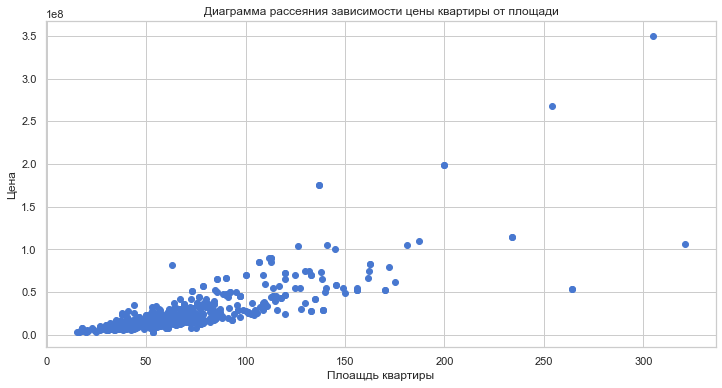

In [23]:
plt.scatter(df[' Square'], df[' Price'])
plt.title('Диаграмма рассеяния зависимости цены квартиры от площади')
plt.xlabel('Плоащдь квартиры')
plt.ylabel('Цена');

На диаграмме соотношения цены и общей площади видно, что между этими пременными присутствует высокая положительная линейная связь (0.798). Однако на графике рассеяния заметно, что есть выбросы, на это следует обратить внимание.

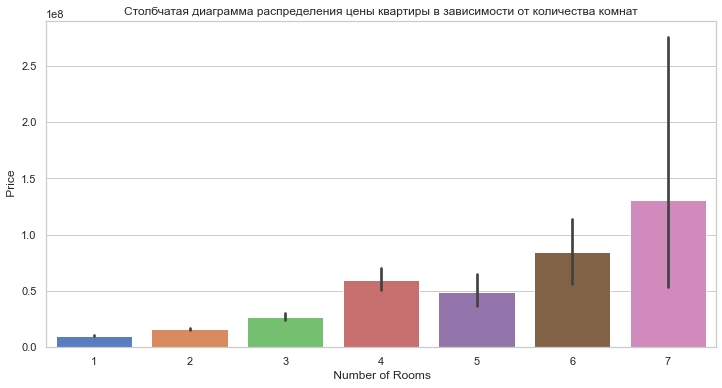

In [24]:
sns.barplot(df[' Number of Rooms'], df[' Price'])
plt.title('Столбчатая диаграмма распределения цены квартиры в зависимости от количества комнат');

Столбчатая диаграмма распределения цены квартиры в зависимости от количества комнат показывает связь между категориальной переменной (однокомнатная, двухкомнатная, трехкомнатная и т.д. квартира) и ценой квартиры (значения большие по сравнению с количеством комнат, поэтому на оси у значения цен, умноженные на 10^8). Заметен логичный вывод, что наиболее высокая цена у 7-комнатных квартир, наименьшая – у однокомнатных. При этом цены на квартиры с 5 комнатами ниже, чем четырехкомнатных и шестикомнатных (странно, конечно, ну ладно).

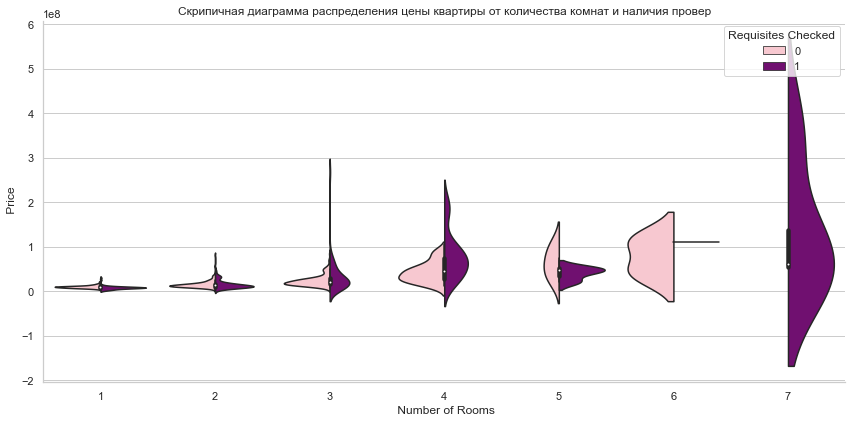

In [32]:
sns.catplot(data = df, x=' Number of Rooms', y=' Price', kind = 'violin', hue = 'Requisites Checked',palette = ['pink', 'purple'], aspect = 2, height = 6, split = True,  legend_out = False)
plt.title('Скрипичная диаграмма распределения цены квартиры от количества комнат и наличия провер');

Анализируя черные тонкие полосы, можем утверждать, что 95% доверительные интервалы цен квартир при их группировке на количество комнат особенно большие у 3-комнатных квартир, что говорит нам о возможном большом значении дисперсии их стоимости, хотя дело может быть в небольшом количестве объявлений продаж квартир с таким количеством комнат (но это не наш случай, так как мы помним, что 3-х комнатных квартир в нашей выборке достаточно). В это же время квартиры с другим количеством комнат имеют достаточно небольшие 95% доверительные интервалы и наталкивают на противоположные выводы: либо у выборок малое значение дисперсии, либо в них большое количество наблюдений.

Смотря на толстую черную полосу, можем судить о межквартильном диапазоне. Практически у всех типов квартир он маленький, разброс их цен маленький. А самый большой у 7-комнатных квартир, что говорит нам о большой величине размаха цен квартир с таким количеством комнат.

Закодируем оставшиеся категориальные признаки one-hot'ом .

In [26]:
df = pd.get_dummies(df)
df

,Number of Rooms,Square,Current Floor,Total Floors,Price,Requisites Checked,Auction,Красная,Зеленая,Синяя,...,Metro_Шоссе Энтузиастов,Metro_Щукинская,Metro_Щёлковская,Metro_Электрозаводская,Metro_Юго-Восточная,Metro_Юго-Западная,Metro_Южная,Metro_Ясенево,Metro_р-н Северный,Metro_р-н Южное Бутово
0,4,138.0,4,59,74000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,37.1,3,9,13900000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,132.0,5,59,75000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,38.0,6,8,13400000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,84.0,5,31,35950000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,1,34.1,8,9,9000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
974,3,64.0,14,14,14300000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
975,1,31.0,3,9,8550000,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
976,1,33.0,4,5,10500000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


На данном этапе работы не будем стандартизировать числовые признаки, так как сначала необходимо разделить выборку на train и test (дабы модель "не подглядела" данные из теста), что является частью уже машинного обучения. 

# Гипотезы

Опираясь на анализ данных, выяснили, что наибольшая корреляция с переменной «Price» наблюдается у переменной «Коричневая ветка метро» (0.254640) 
и у переменной «Голубая ветка метро» (0.150928). Поэтому хотим посмотреть, значительна ли между ними разница математических ожиданий, то есть значительна ли разница между средней ценой квартиры на данных ветках метро. 
 
H0: математическое ожидание цены квартиры на коричневой ветке метро равно математическому ожиданию цены квартиры на голубой ветке метро 
 
Н1: математическое ожидание цены квартиры на коричневой ветки метро не равно математическому ожиданию цены квартиры на голубой ветке метро 
 
Проверять гипотезы будем при уровне значимости - 5%.

Предполагаемый алгоритм: 
1. Возьмем квартиры, которые расположены на голубой или на коричневой ветках метро. Разделим данные квартиры на две выборки: первая – квартиры на голубой ветке метро, вторая – квартиры на коричневой ветке метро. Предварительно мы посчитали количество квартир в каждой выборке, чтобы избежать дисбаланса в них. В итоге, в выборке коричневой ветки - 14 квартир, а в голубой – 33. Видим, дисбаланс в выборках, а главное - немного наблюдений. Следовательно, будем использовать t-статистику. 
2. Проверить независимость этих двух выборок. Выяснили, что корреляция между нашими выборками есть, но очень слабая (0.07). 
3. Рассчитываем p-value, поскольку с помощью нее сможем проверить уровень значимости не только 5%, но и другие (например, 10%). Для построения p-value необходимо найти t-статистику. Для этого считаем дисперсию по выборке, она будет оцененная, так как данных немного (47 квартир).

In [27]:
df['Коричневая'].sum()

14

In [28]:
df['Голубая'].sum()

33

In [29]:
df.corr()['Коричневая']['Голубая']

0.0728241104652727